In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.chdir('..')
%matplotlib inline

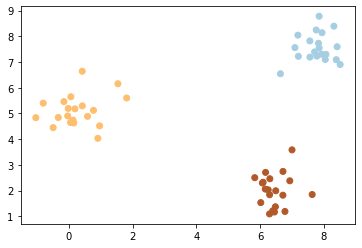

In [2]:
from tools.datasets import DataGenerator
data_generator = DataGenerator(p=3, sep=10, seed=10)
data, label = data_generator.get_data()
data_generator.plot()

## 完整聚类模型

`Mycluster(data, model, minimizer, lambda_, tol=10**(-3), max_iter=np.infty, **param)`
- `model`: 模型名称 {'Huber-type','Weighted'}
- `minimizer`: 优化器名称 {'AGM','NewtonCG'}
- `**param`: 模型与优化器其他参数（详见`0 test field.ipynb`）

Applying: AGM
iter:2188	d_norm:0.0041	obj:602.99961
Complete!
--------
Result
--------
+ Model: Huber-type
  - lambda:                    0.2
  - delta:                   0.005
+ Minimizer: AGM
  - Max Iteration:             inf
  - Tolerance:               0.005
+ Performance:
  - Data Shape:             2 x 60
  - Iteration Times:          2188
  - Duration:               4.823s
  - Number of Clusters:          3
  - Number of Classes:           3
  - Compression Ratio:       0.132
  - Homogeneity:             1.000
  - Completeness:            1.000
  - V-measure(beta=1):       1.000


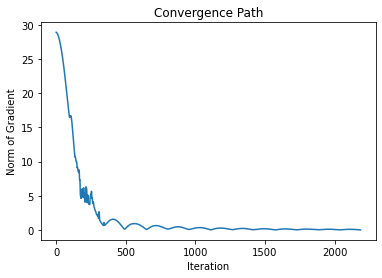

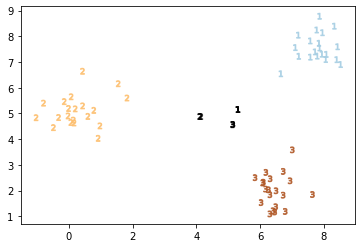

In [3]:
from tools.full_model import MyCluster

my_cluster=MyCluster(data=data,
                     model='Huber-type',
                     minimizer='AGM',
                     lambda_=0.2,
                     tol=0.005,
                     delta=0.005)


my_cluster.optimize() # 执行优化

my_cluster.solution_to_cluster(epsilon=0.01) # 根据优化结果聚类（因为epsilon可能需要调整，所以单独拿出来了）

my_cluster.get_result_panel(label,beta=1) # 查看各指标
my_cluster.plot2d(data_generator) # 生成数据可以查看可视化结果